In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('class data.csv')
df['Water'] = df['Water'].astype('category')
df['Selfies'] =df['Selfies'].astype('category')
df = df.dropna()
df

,Aim_pct,Water,Hrs_sleep,Siblings,Selfies
0,75,1,8.0,1.0,0.0
1,70,1,8.0,1.0,1.0
2,65,1,8.0,1.0,0.0
3,85,1,7.0,2.0,0.0
4,75,1,6.0,3.0,0.0
...,...,...,...,...,...
158,70,1,6.0,1.0,0.0
159,89,1,6.0,6.0,0.0
160,85,1,6.5,3.0,0.0
161,70,1,9.0,3.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 162
Data columns (total 5 columns):
Aim_pct      162 non-null int64
Water        162 non-null category
Hrs_sleep    162 non-null float64
Siblings     162 non-null float64
Selfies      162 non-null category
dtypes: category(2), float64(2), int64(1)
memory usage: 5.6 KB


In [4]:
df[['Hrs_sleep','Aim_pct']] = scale(df[['Hrs_sleep','Aim_pct']]) 
df.head()

,Aim_pct,Water,Hrs_sleep,Siblings,Selfies
0,-0.059144,1,1.214767,1.0,0.0
1,-0.753442,1,1.214767,1.0,1.0
2,-1.447741,1,1.214767,1.0,0.0
3,1.329453,1,0.449038,2.0,0.0
4,-0.059144,1,-0.316690,3.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05de928950>,
      dtype=object)

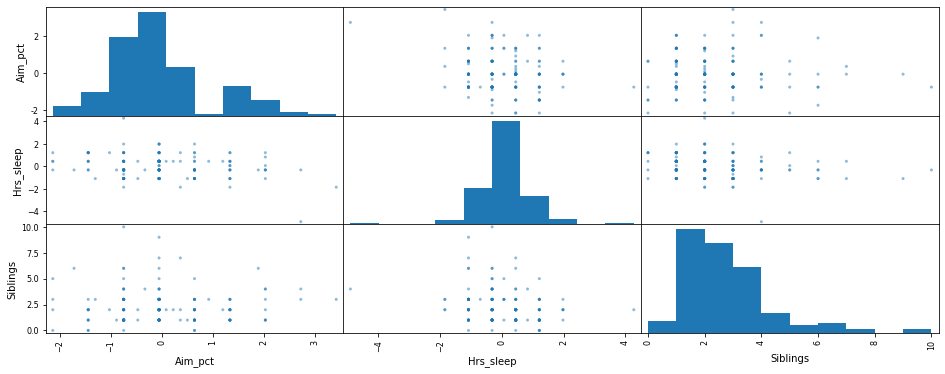

In [5]:
pd.plotting.scatter_matrix(df, figsize=(16,6))

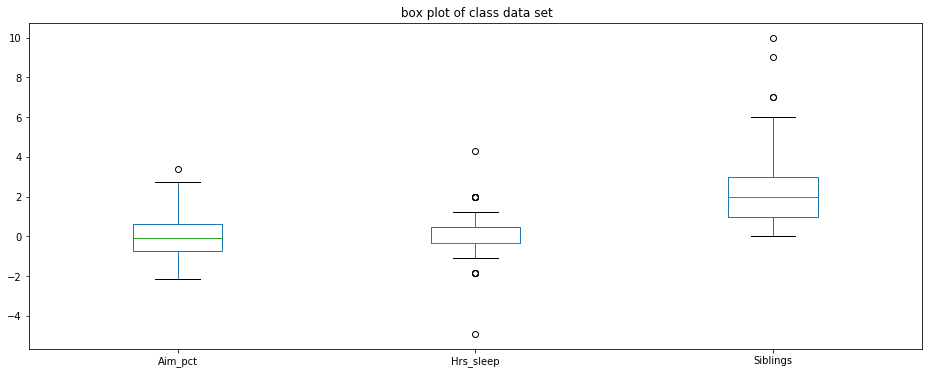

In [6]:
df.plot.box(figsize=(16,6), title=' box plot of class data set')

In [7]:
 X_train, X_test, y_train, y_test = train_test_split(df[['Siblings','Selfies','Hrs_sleep']] ,df['Aim_pct'], test_size=0.3)

In [8]:
X_enog = sm.add_constant(X_train)
df_train = pd.concat([X_train, y_train], axis =1)

model = sm.formula.ols('Aim_pct~Siblings+C(Selfies)+Hrs_sleep', data=df_train).fit()
model2 = sm.formula.ols('Aim_pct~C(Selfies)+Hrs_sleep', data=df_train).fit()
model3 = sm.formula.ols('Aim_pct~Siblings+Hrs_sleep', data=df_train).fit()
model4 = sm.formula.ols('Aim_pct~Hrs_sleep', data=df_train).fit()

/home/kheagan/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Aim_pct   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     3.454
Date:                Wed, 15 Jan 2020   Prob (F-statistic):             0.0190
Time:                        14:00:46   Log-Likelihood:                -151.60
No. Observations:                 113   AIC:                             311.2
Df Residuals:                     109   BIC:                             322.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0567      0.164      0.346      0.730      -0.268       0.382
C(Selfies)[T.0.1]  7.554e-18   3.42e-17      0.221      0.826   -6.03e-17    7.54e-17
C(Selfies)[T.1.0]     0.0061      0.312      0.019      0.985      -0.613       0.625
Siblings             -0.0156      0.061     -0.256      0.798      -0.137       0.105
Hrs_sleep            -0.2715      0.086     -3.175      0.002      -0.441      -0.102
==============================================================================
Omnibus:                        3.314   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.191   Jarque-Bera (JB):                2.982
Skew:                           0.397   Prob(JB):                        0.225
Kurtosis:                       3.058   Cond. No.                     5.92e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.52e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [10]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Aim_pct   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     5.193
Date:                Wed, 15 Jan 2020   Prob (F-statistic):            0.00700
Time:                        14:00:47   Log-Likelihood:                -151.63
No. Observations:                 113   AIC:                             309.3
Df Residuals:                     110   BIC:                             317.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0221      0.092      0.239      0.812      -0.161       0.205
C(Selfies)[T.0.1] -1.551e-17    3.5e-17     -0.443      0.659   -8.49e-17    5.38e-17
C(Selfies)[T.1.0]     0.0067      0.311      0.022      0.983      -0.610       0.623
Hrs_sleep            -0.2662      0.083     -3.221      0.002      -0.430      -0.102
==============================================================================
Omnibus:                        3.331   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.189   Jarque-Bera (JB):                3.014
Skew:                           0.399   Prob(JB):                        0.222
Kurtosis:                       3.048   Cond. No.                     1.83e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.84e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [11]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Aim_pct   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     5.229
Date:                Wed, 15 Jan 2020   Prob (F-statistic):            0.00677
Time:                        14:00:47   Log-Likelihood:                -151.60
No. Observations:                 113   AIC:                             309.2
Df Residuals:                     110   BIC:                             317.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0572      0.161      0.356      0.722      -0.261       0.376
Siblings      -0.0156      0.061     -0.257      0.797      -0.136       0.105
Hrs_sleep     -0.2715      0.085     -3.191      0.002      -0.440      -0.103
==============================================================================
Omnibus:                        3.319   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.985
Skew:                           0.397   Prob(JB):                        0.225
Kurtosis:                       3.059   Cond. No.                         5.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Aim_pct   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     10.48
Date:                Wed, 15 Jan 2020   Prob (F-statistic):            0.00159
Time:                        14:00:47   Log-Likelihood:                -151.63
No. Observations:                 113   AIC:                             307.3
Df Residuals:                     111   BIC:                             312.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0227      0.088      0.258      0.797      -0.151       0.197
Hrs_sleep     -0.2663      0.082     -3.237      0.002      -0.429      -0.103
==============================================================================
Omnibus:                        3.336   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.189   Jarque-Bera (JB):                3.018
Skew:                           0.400   Prob(JB):                        0.221
Kurtosis:                       3.049   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model4.fittedvalues

120   -1.064378
157    1.139872
103    1.222430
161   -0.248725
129    2.897499
         ...   
125   -0.370080
86    -0.656552
119    2.018686
90     0.185359
107    0.037747
Length: 113, dtype: float64

In [13]:
lm = LinearRegression().fit(X=X_train,y=y_train)

In [14]:
lm.coef_

array([-0.01563987,  0.0060631 , -0.27148829])

In [15]:
lm.intercept_

0.05667664861400472

In [16]:
predictions = lm.predict(X_test)

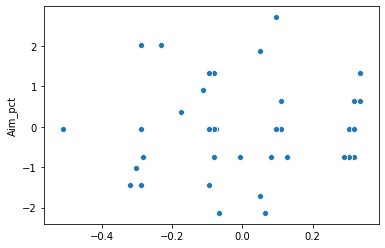

In [17]:

sns.scatterplot(predictions, y_test)

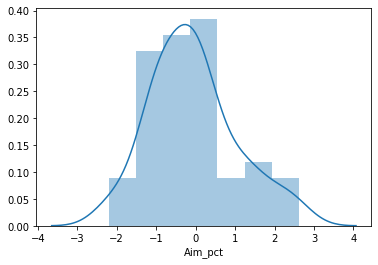

In [18]:
sns.distplot(y_test-predictions)